<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [51]:
import pandas as pd
import psycopg2

In [52]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python

In [ ]:
DBNAME = 'project_sql'
USER = ''
PASSWORD = ''
HOST = ''
PORT = 5432
connection = psycopg2.connect(   dbname=DBNAME,   user=USER,   host=HOST,   password=PASSWORD,   port=PORT)
areas = pd.read_sql_query(f'''select * from areas''', connection)
industries = pd.read_sql_query(f'''select * from industries''', connection)
vacancies = pd.read_sql_query(f'''select * from vacancies''', connection)
employers = pd.read_sql_query(f'''select * from employers''', connection)
employers_industries = pd.read_sql_query(f'''select * from employers_industries''', connection)

In [54]:
# Отображение таблиц для удобства сведения
display('areas', areas.head(1)); display('industries', industries.head(1)); display('vacancies', vacancies.head(1)); display('employers',employers.head(1)); display('employers_industries', employers_industries.head(1))

'areas'

,id,name
0,2758,Тбилиси


'industries'

,id,name
0,7.540,Разработка программного обеспечения


'vacancies'

,id,name,key_skills,schedule,experience,employment,salary_from,salary_to,area_id,employer_id
0,55312386,Компьютерный Мастер,Пользователь ПК\tРабота в команде\tРемонт ноут...,Полный день,Нет опыта,Полная занятость,64000.0,NaN,1516,5724811


'employers'

,id,name,area
0,2393,"Программный Продукт, ИТ-компания",1


'employers_industries'

,employer_id,industry_id
0,2393,7.540


# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies).

In [ ]:
query1 = pd.read_sql_query(f'''select count(*) from vacancies''', connection)
query1

###результат запроса
###49197

2. Напишите запрос, который посчитает количество работодателей (таблица employers).

In [ ]:
query2 = pd.read_sql_query(f'''select count(distinct id) from employers''', connection)
query2

###результат запроса
###23501

3. Посчитате с помощью запроса количество регионов (таблица areas).

In [ ]:
query3 = pd.read_sql_query(f'''select count(*) from areas''', connection)
query3

###результат запроса
###1362

4. Посчитате с помощью запроса количество сфер деятельности в базе (таблица industries).

In [ ]:
query4 = pd.read_sql_query(f'''select count(*) from industries''', connection)
query4

###результат запроса
###294

***

###Выводы по юниту
####Данные присутствуют, вакансий в два раза больше, чем работодателей

# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [ ]:
areas_top_vac = pd.read_sql_query(f'''select a.name, count(*) from areas a join vacancies v on a.id = v.area_id group by 1 order by 2 desc''', connection)
areas_top_vac

###результат запроса
####	name	count
####0	Москва	5333
####1	Санкт-Петербург	2851
####2	Минск	2112
####3	Новосибирск	2006
####4	Алматы	1892

2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [ ]:
vacancies_where_salary_filled = pd.read_sql_query(f'''select count(*) from vacancies where (salary_from > 0 or salary_to > 0)''', connection)
vacancies_where_salary_filled

###Результат запроса
####24073

3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [ ]:
vacancies_mid_zp = pd.read_sql_query(f'''select AVG(salary_from)::integer min_avgzp, AVG(salary_to)::integer max_avgzp FROM vacancies''', connection)
vacancies_mid_zp

###Результат запроса
####min_avgzp	max_avgzp
#### 71065	110537

4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [ ]:
count_shed_cnt_emp = pd.read_sql_query(f'''select schedule, employment, count(*) FROM vacancies group by 1,2 order by 3 desc''', connection)
count_shed_cnt_emp

###Результат запроса
#### schedule	employment	count
#### 0	Полный день	Полная занятость	35367
####1	Удаленная работа	Полная занятость	7802

5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта.

In [ ]:
exp_count = pd.read_sql_query(f'''select experience, count(*) FROM vacancies group by 1 order by 2 asc''', connection)
exp_count

###Результат запроса
####experience	count
####Более 6 лет	1337
####Нет опыта	7197
####От 3 до 6 лет	14511
####От 1 года до 3 лет	26152




***

### выводы по детальному анализу вакансий
#### Чем крупнее и привлекательнее город, тем больше вакансий.
#### Половина вакансий без указания зп.
#### Разница между минимальной и максимальной зп - составляет половину минимальной зп.
#### Подавляющее большинство вакансий - Полная занятость
#### В основном требуются работники с опытом работы От 1 года до 3 лет, далее от От 3 до 6 лет

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [ ]:
cnt_rabotodateli = pd.read_sql_query(f'''(SELECT e.name, count(*) as "1 and 5th place" FROM vacancies v join employers e on e.id = v.employer_id GROUP BY 1 ORDER BY 2 DESC LIMIT 1 OFFSET 0)UNION(SELECT e.name, count(*) FROM vacancies v join employers e on e.id = v.employer_id GROUP BY 1 ORDER BY 2 DESC LIMIT 1 OFFSET 4) order by 2 desc; ''', connection)
cnt_rabotodateli

###результат запроса
####name	1 and 5th place
####0	Яндекс	1933
####1	Газпром нефть	331

2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [ ]:
# 2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
#Пришлось раздельно считать и склеивать, т.к. в одном запросе при двойном join виснет
areas_cnt = pd.read_sql_query(f'''(
select re.region, re.cnt_emp, rv.cnt_vac
from (
SELECT a.name as region, count(e.id) as cnt_emp
FROM areas a
left join employers e on a.id = e.area
GROUP BY 1
order by 2 desc
) re
join (
SELECT a.name as region, count(v.id) as cnt_vac
FROM areas a
left join vacancies v on a.id = v.area_id
GROUP BY 1
order by 2 desc
) rv on re.region = rv.region)''', connection)
display(areas_cnt)
# Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.
Col_Employers_with_no_vacancies = pd.read_sql_query(f'''(
SELECT a.name as Region, count(*) as Col_Employers_with_no_vacancies
FROM areas a
left join vacancies v on a.id = v.area_id
left join employers e on a.id = e.area
where v.area_id is null
GROUP BY 1
order by 2 desc
LIMIT 1)''', connection)

display(areas_cnt)
display(Col_Employers_with_no_vacancies)

###Результат запроса
####region	cnt_emp	cnt_vac
####Москва	5864	5333
####Санкт-Петербург	2217	2851
####Минск	1115	2112
####Алматы	721	1892
####Екатеринбург	609	1698

####Россия	410

In [ ]:
# Еще вариант
areas_cnt = pd.read_sql_query(f'''(
SELECT a.name as Region
from areas a
left join vacancies v on a.id = v.area_id
where v.area_id is null
ORDER BY (SELECT COUNT(DISTINCT e.id) FROM employers e WHERE e.area = a.id) DESC limit 1
)''', connection)
areas_cnt

###результат запроса
####Россия

3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [ ]:
emrinregs = pd.read_sql_query(f'''(
SELECT e.name as employers, count(distinct v.area_id) as cnt_area
FROM employers e
join vacancies v on e.id = v.employer_id
GROUP BY 1
order by 2 desc)''', connection)
emrinregs

###Результат запроса
####employers	cnt_area
####0	Яндекс	181
####1	Ростелеком	152
####2	Спецремонт	116
####3	Поляков Денис Иванович	88
####4	ООО ЕФИН	71

4. Напишите запрос для подсчёта количества работодателей, у которых не указана
сфера деятельности.

In [ ]:
emrinregsnodeyat = pd.read_sql_query(f'''(
SELECT count(id)
FROM employers i left join employers_industries e on e.employer_id = i.id
where industry_id is Null
)''', connection)
emrinregsnodeyat

###результат запроса
####8419

5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности.

In [ ]:
empcnt3 = pd.read_sql_query(f'''(
SELECT name, count(distinct industry_id) as cnt
FROM employers_industries e join employers i on e.employer_id = i.id
group by 1
HAVING count(distinct industry_id) = 4
order by 1, 2 desc
limit 1 offset 2
)''', connection)
empcnt3

###результат запроса
####name	cnt
####2ГИС	4

6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [ ]:
Rcnt = pd.read_sql_query(f'''(
SELECT count(id)
FROM employers_industries e join industries i on e.industry_id = i.id
where name like 'Разработка программного обеспечени%'
)''', connection)
Rcnt

###результат запроса
####3553

7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8).

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API.

In [ ]:
# код для получения списка городов-милионников
import requests
from bs4 import BeautifulSoup

# Загружаем страницу
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

# Находим таблицу с классом "standard"
table = soup.find('table', {'class': 'standard'})

cities = []
if table:
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) >= 2:
            # Извлекаем название города из второй ячейки
            city_link = cells[1].find('a')
            if city_link:
                cities.append(city_link.get_text(strip=True))
else:
    print("Таблица с городами не найдена")
display(cities)

###результат запроса
####['Москва',
 'Санкт-Петербург',
 'Новосибирск',
 'Екатеринбург',
 'Казань',
 'Красноярск',
 'Нижний Новгород',
 'Челябинск',
 'Уфа',
 'Самара',
 'Ростов-на-Дону',
 'Краснодар',
 'Омск',
 'Воронеж',
 'Пермь',
 'Волгоград']

In [ ]:
# Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании,
# вместе с количеством вакансий в этих регионах.
# Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.
import requests
from bs4 import BeautifulSoup

# Загружаем страницу
url = 'https://ru.wikipedia.org/wiki/Города-миллионеры_России'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'lxml')

# Находим таблицу с классом "standard"
table = soup.find('table', {'class': 'standard'})

cities = []
if table:
    for row in table.find_all('tr'):
        cells = row.find_all('td')
        if len(cells) >= 2:
            # Извлекаем название города из второй ячейки
            city_link = cells[1].find('a')
            if city_link:
                cities.append(city_link.get_text(strip=True))
else:
    print("Таблица с городами не найдена")

# display(cities)
cities_sql = ", ".join([f"'{i}'" for i in cities])

Rcnt = pd.read_sql_query(f'''(
(SELECT a.name, count(v.id)
FROM vacancies v
join areas a on v.area_id = a.id
join employers e on e.id = v.employer_id
where e.name = 'Яндекс' and a.name IN ({cities_sql})
group by 1
order by 2 asc)
union all
select 'Total', sum(rr.count) from (SELECT a.name, count(v.id)
FROM vacancies v
join areas a on v.area_id = a.id
join employers e on e.id = v.employer_id
where e.name = 'Яндекс' and a.name IN ({cities_sql})
group by 1
)rr)''', connection)
Rcnt

###результат запроса
####name	count

####0	Омск	21.0
####1	Челябинск	22.0
####2	Красноярск	23.0
####3	Волгоград	24.0
####4	Пермь	25.0
####5	Казань	25.0
####6	Ростов-на-Дону	25.0
####7	Уфа	26.0
####8	Самара	26.0
####9	Краснодар	30.0
####10	Воронеж	32.0
####11	Новосибирск	35.0
####12	Нижний Новгород	36.0
####13	Екатеринбург	39.0
####14	Санкт-Петербург	42.0
####15	Москва	54.0
###16	Total	485.0

***

### выводы по анализу работодателей
####В Яндекс в 6 раз больше вакансий чем в Газпроме
####В Москве, Санкт-Петербурге и Минске больше всего работодателей и вакансий.

####Регион Россия реже всего указывают в вакансиях.
####Компании - Яндекс, Ростелеком, Спецремонт и Поляков Денис Иванович больше всего присутствуют в регионах
####У 8419 работодателей не указана сфера деятельности
####Компания 2ГИС находится на 3м месте среди компаний у которых указаны 4 сферы деятельности
####3553 компаний указали Разработку по в сфере своей деятельности
####Компания Яндекс предствалена в городах миллионниках, общее количество вакансий 485

# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.*


In [ ]:
cnt_vac_dataordann = pd.read_sql_query(f'''(
SELECT count(v.id)
FROM vacancies v
where name ILIKE '%data%' or name ILIKE '%данн%'
)''', connection)
cnt_vac_dataordann

###результат запроса
####1771

2. Сколько есть подходящих вакансий для начинающего дата-сайентиста?
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.


In [ ]:
# текст запроса
cnt_vac_dataordann = pd.read_sql_query(f'''(
SELECT count(v.id)
FROM vacancies v
where
(name ilike '%data scientist%'
or name ilike '%data science%'
or name ilike '%исследователь данных%'
or name ilike '%machine learning%'
or name ilike '%машинн%обучен%'
 OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
and (name ilike '%junior%' or experience = 'Нет опыта' or employment = 'Стажировка')
)''', connection)
cnt_vac_dataordann

###результат запроса
####51

3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [ ]:
# текст запроса
# в названии есть слово 'junior' или требуемый опыт — Нет опыта или тип трудоустройства — Стажировка.

cnt_vac_dataordann = pd.read_sql_query(f'''(
SELECT count(id)
FROM vacancies v
where
(name ilike '%data scientist%'
or name ilike '%data science%'
or name ilike '%исследователь данных%'
or name ilike '%machine learning%'
or name ilike '%машинн%обучен%'
 OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
and (key_skills ilike '%SQL%' or key_skills ilike '%postrgres%')
)''', connection)
cnt_vac_dataordann

###результат запроса
####229

4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [ ]:
# текст запроса
# в названии есть слово 'junior' или требуемый опыт — Нет опыта или тип трудоустройства — Стажировка.

cnt_vac_dataordann = pd.read_sql_query(f'''(
SELECT count(id)
FROM vacancies v
where
(name ilike '%data scientist%'
or name ilike '%data science%'
or name ilike '%исследователь данных%'
or name ilike '%machine learning%'
or name ilike '%машинн%обучен%'
 OR (name ILIKE '%ML%' AND name NOT ILIKE '%HTML%'))
and (key_skills ilike '%python%')
)''', connection)
cnt_vac_dataordann

###результат запроса
####357

5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?
Ответ округлите до двух знаков после точки-разделителя.

In [ ]:
# текст запроса
# Сколько ключевых навыков в среднем указывают в вакансиях для DS? Ответ округлите до двух знаков после точки-разделителя.

cnt_vac_dataordann = pd.read_sql_query(f'''(
      select round(avg(length(key_skills) - LENGTH(REPLACE(key_skills, '\t', ''))+1),2) as AVG_kl_navikov
      FROM vacancies v
where
(name ilike '%data scientist%'
or name ilike '%data science%'
or name ilike '%исследователь данных%'
or name ilike '%machine learning%'
or name ilike '%машинн%обучен%'
 OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%'))
  AND key_skills IS NOT NULL
 )''', connection)
cnt_vac_dataordann

###результат запроса
####6.41

6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*).

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа.

***

In [ ]:
cnt_vac_dataordann = pd.read_sql_query(f'''(
  SELECT ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0)
FROM vacancies
WHERE (
    name ILIKE '%data scientist%'
    OR name ILIKE '%data science%'
    OR name ILIKE '%исследователь данных%'
    OR name ILIKE '%machine learning%'
    OR name ILIKE '%машинн%обучен%'
    OR (name LIKE '%ML%' AND name NOT ILIKE '%HTML%')
)
AND experience = 'От 3 до 6 лет'
AND key_skills IS NOT NULL
 )''', connection)
cnt_vac_dataordann

###результат запроса
####243115

### выводы по предметному анализу
##### Проанализировано 49197 вакансий.
#####1771 вакансий (около 3.6%) связаны с "data" или "данными".
#####Наблюдается низкое количество вакансий для junior-специалистов (51).
#####Популярные навыки: SQL (229 вакансий), Python (357 вакансий).
#####В среднем в вакансиях указывается 6 ключевых навыков.
#####Средняя заработная плата составляет 243115 рублей.
#####Рекомендуется развивать навыки в области Data, в частности, SQL и Python.

# Общий вывод по проекту

#### подведем итог исследования, обобщите выводы
#### здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования


####Замечания - до работы с базой нужно провести существенную реструктуризацию, синонимизацию данных т.е. привести данные к единому шаблону. Зачастую встречаются вакансии имеющие различное написание, но по факту одинаковое значение, встречаютсяч пробелы, дефисы, перестановки, различия в регистре.

#### Проведенное исследование вакансий в сфере Data позволило выявить ряд ключевых тенденций на рынке труда:
#### 3.6% вакансий напрямую связаны с "data" или "данными"
#### Низкое количество вакансий для junior-специалистов (51) говорит о нехватке кадров на начальном уровне.
#### Популярность SQL и Python: SQL и Python являются ключевыми навыками для специалистов в области Data.
#### Среднее количество ключевых навыков в вакансиях (6) говорит о высокой конкуренции на рынке труда.
#### Средняя заработная плата в сфере Data является достаточно высокой (243115 рублей).

### Дополнительные исследования
#### Ниже представлены графики для наглядного анализа
#### Исследование можно продолжить, углубив анализ в следующих направлениях:
#### Анализ зарплат по регионам: Провести анализ зарплат по регионам для выявления наиболее привлекательных регионов для работы.
#### Анализ популярных технологий: Провести анализ популярных технологий в для выявления наиболее востребованных.

#### Варианты продолжения исследования
#### Анализ вакансий на других платформах: Провести анализ вакансий на других платформах - например SuperJob.



# Дополнительные материалы - Графики

<ipython-input-79-4123e7eaa81f>:6: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

<ipython-input-79-4123e7eaa81f>:16: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

<ipython-input-79-4123e7eaa81f>:44: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




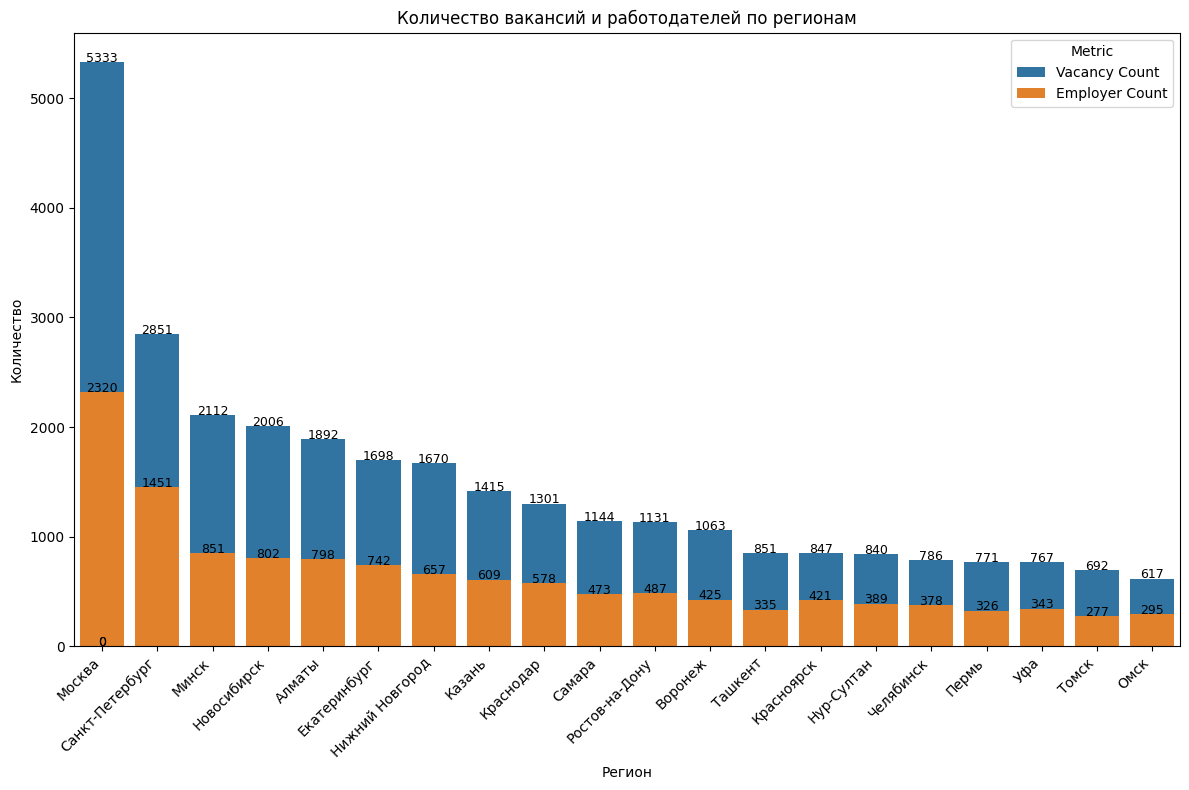

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import psycopg2

areas_top_vac = pd.read_sql_query(
    '''SELECT a.name, count(*) AS vacancy_count
       FROM areas a
       JOIN vacancies v ON a.id = v.area_id
       GROUP BY a.name
       ORDER BY vacancy_count DESC
       LIMIT 20''',
    connection
)

areas_top_employers = pd.read_sql_query(
    '''SELECT a.name, count(DISTINCT e.id) AS employer_count
       FROM areas a
       JOIN vacancies v ON a.id = v.area_id
       JOIN employers e ON v.employer_id = e.id
       GROUP BY a.name
       ORDER BY employer_count DESC
       LIMIT 20''',
    connection
)

# Объединим базы
merged_data = pd.merge(areas_top_vac, areas_top_employers, on='name', how='outer').fillna(0).sort_values('vacancy_count', ascending=False)


# Переделаем для графика
data_for_plot = pd.DataFrame({
    'Region': merged_data['name'],
    'Vacancy Count': merged_data['vacancy_count'],
    'Employer Count': merged_data['employer_count']
})

data_melted = pd.melt(data_for_plot, id_vars=['Region'],
                     value_vars=['Vacancy Count', 'Employer Count'],
                     var_name='Metric', value_name='Count')


plt.figure(figsize=(12, 8))
barplot = sns.barplot(data=data_melted, x='Region', y='Count', hue='Metric', orient='v', ci=None, dodge=False)

# Подпишем график
plt.xlabel('Регион')
plt.ylabel('Количество')
plt.title('Количество вакансий и работодателей по регионам')
plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{int(height)}',
                 ha="center", fontsize=9)

plt.tight_layout()
plt.show()

## Подавляющее число вакансий и работодателей находятся в Москве и в крупных городах

<ipython-input-80-e6be9b43a4f3>:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.



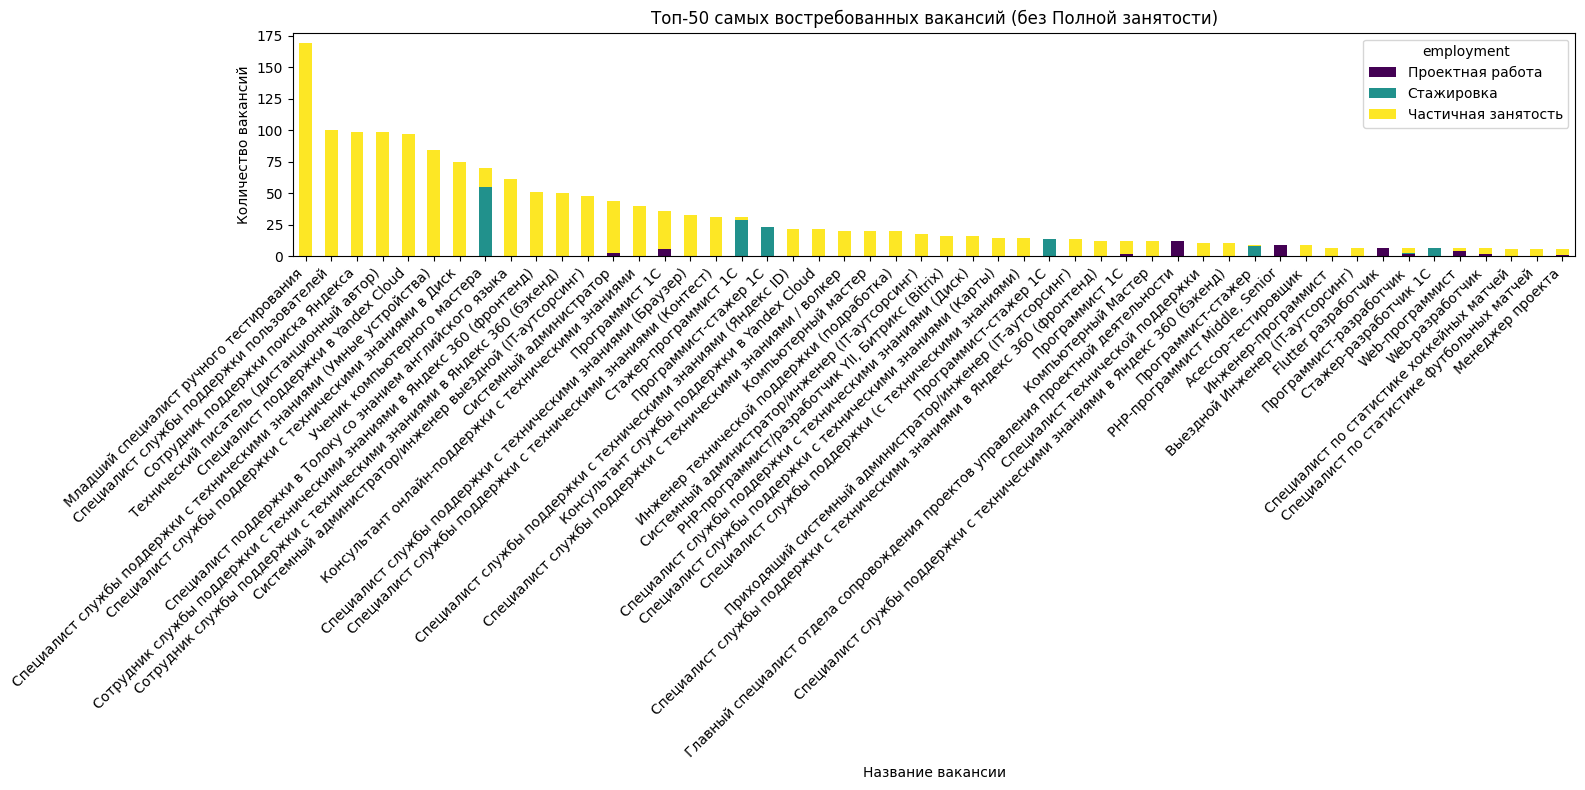

In [80]:
top_vacancies_employment = pd.read_sql_query(
    '''SELECT name, employment, count(*) AS vacancy_count
       FROM vacancies
       where employment != 'Полная занятость'
       GROUP BY name, employment
       ORDER BY name, vacancy_count DESC''',
    connection
)

top_vacancies_employment = top_vacancies_employment.pivot_table(
    index='name',
    columns='employment',
    values='vacancy_count',
    fill_value=0
)

top_vacancies_employment['Total'] = top_vacancies_employment.sum(axis=1)

top_vacancies_employment = top_vacancies_employment.sort_values(by='Total', ascending=False)


top_vacancies_employment = top_vacancies_employment.drop('Total', axis=1)

top_vacancies_employment = top_vacancies_employment.head(50)

plt.figure(figsize=(16, 8))
top_vacancies_employment.plot(kind='bar', stacked=True, colormap='viridis', ax=plt.gca())

plt.xlabel('Название вакансии')
plt.ylabel('Количество вакансий')
plt.title('Топ-50 самых востребованных вакансий (без Полной занятости)')

plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

## С неполной занятостью также требуются специалисты - техподдержки, консультанты и программисты

<ipython-input-81-94866e98837a>:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

<ipython-input-81-94866e98837a>:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




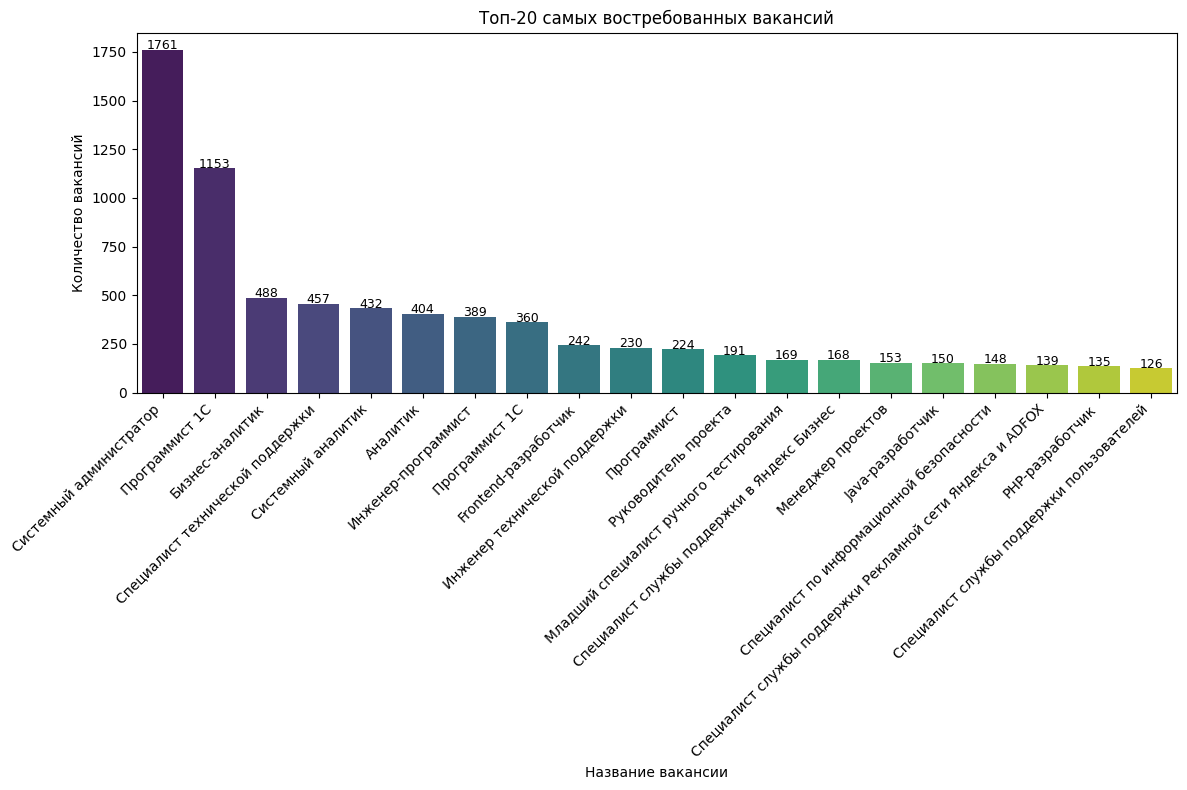

In [81]:
top_vacancies = pd.read_sql_query(
    '''SELECT name, count(*) AS vacancy_count
       FROM vacancies
       GROUP BY name
       ORDER BY vacancy_count DESC
       LIMIT 20''',
    connection
)

plt.figure(figsize=(12, 8))

barplot = sns.barplot(x='name', y='vacancy_count', data=top_vacancies, palette='viridis')

plt.xlabel('Название вакансии')
plt.ylabel('Количество вакансий')
plt.title('Топ-20 самых востребованных вакансий')

plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{int(height)}',
                 ha="center", fontsize=9)

plt.tight_layout()
plt.show()

## Системный администратор самая востребованная профессия, следом идут 1С программисты, аналитики также востребованы

<ipython-input-82-ec9b501b684c>:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

<ipython-input-82-ec9b501b684c>:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




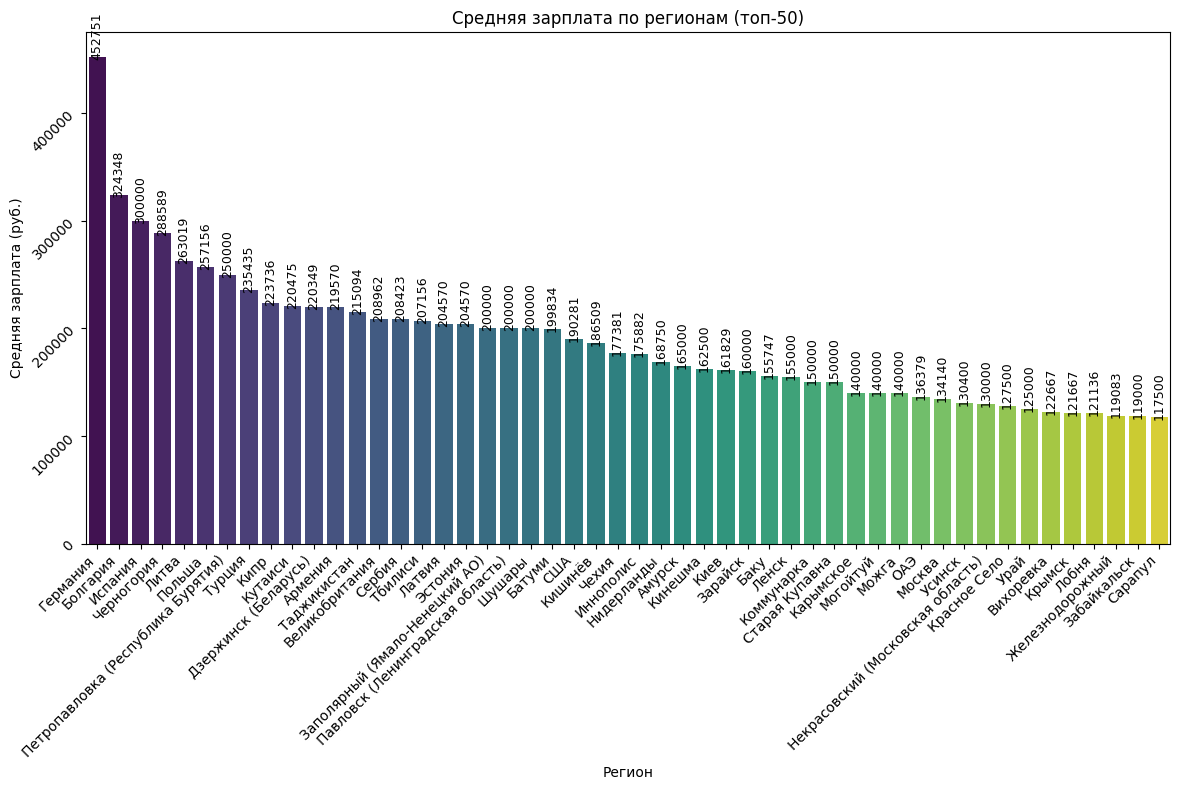

In [82]:
salary_by_region = pd.read_sql_query(
    '''
SELECT
    a.name AS region,
    ROUND(AVG(COALESCE((v.salary_from + v.salary_to) / 2, v.salary_from, v.salary_to)), 0) AS avg_salary
FROM vacancies v
JOIN areas a ON v.area_id = a.id
WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
GROUP BY a.name
ORDER BY avg_salary DESC
LIMIT 50
    ''',
    connection
)

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='region', y='avg_salary', data=salary_by_region, palette='viridis')


plt.xlabel('Регион')
plt.ylabel('Средняя зарплата (руб.)')
plt.title('Средняя зарплата по регионам (топ-50)')


plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=45, ha='right')


for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{height:.0f}',
                    ha="center", rotation=90, fontsize=9)

plt.tight_layout()
plt.show()

## За рубежом зарплаты выше

<ipython-input-83-2f019bf59b3c>:1: UserWarning:

pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.

<ipython-input-83-2f019bf59b3c>:14: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




<Figure size 1200x800 with 0 Axes>

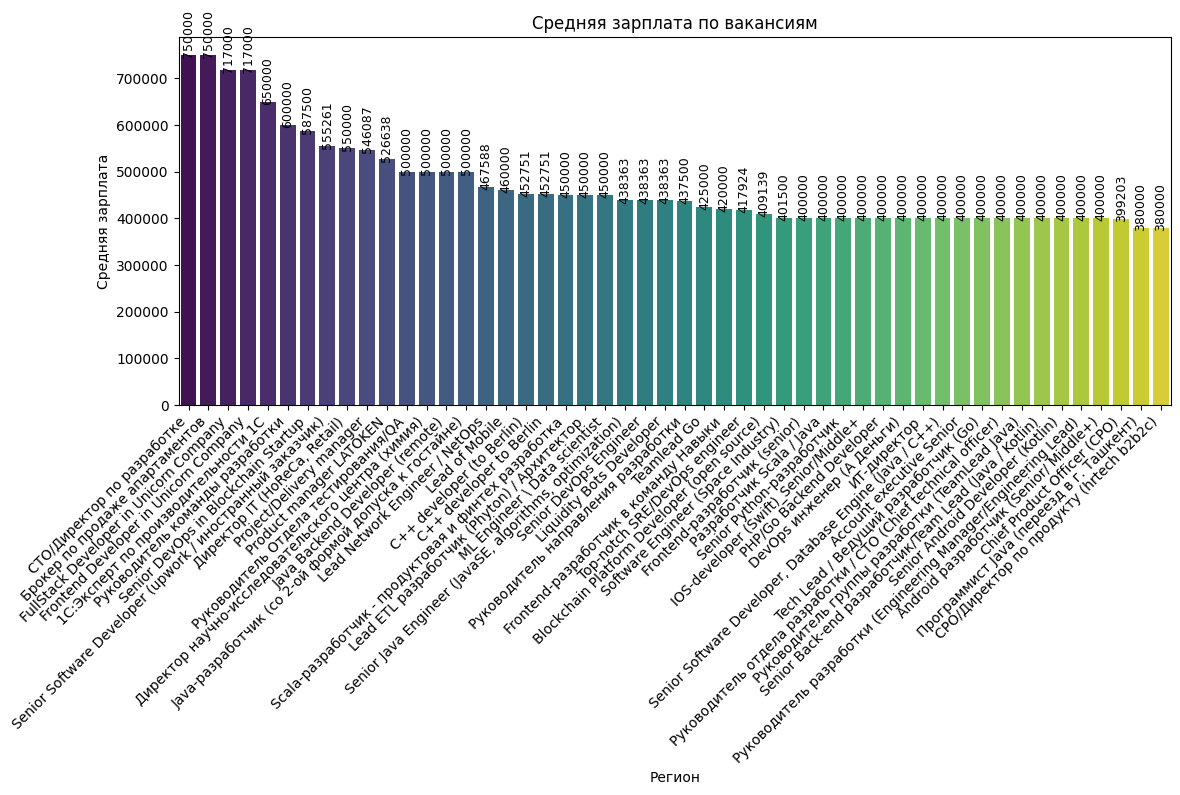

In [83]:
salary_by_region = pd.read_sql_query(f'''(
SELECT name AS region, ROUND(AVG(COALESCE((salary_from + salary_to) / 2, salary_from, salary_to)), 0) AS avg_salary
FROM vacancies v

WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL

GROUP BY 1
ORDER BY avg_salary DESC
LIMIT 50)''', connection)

plt.figure(figsize=(12, 8))

plt.figure(figsize=(12, 8))
barplot = sns.barplot(x='region', y='avg_salary', data=salary_by_region, palette='viridis')


plt.xlabel('Регион')
plt.ylabel('Средняя зарплата')
plt.title('Средняя зарплата по вакансиям')

plt.xticks(rotation=45, ha='right')

for p in barplot.patches:
    height = p.get_height()
    barplot.text(p.get_x() + p.get_width() / 2.,
                 height + 2,
                 f'{height:.0f}',
                 ha="center",  rotation=90,fontsize=9)

plt.tight_layout()
plt.show()

## Самые большие зарплаты у разработчиков

In [84]:
connection.close()